In [4]:
# importing necessary libraries 
# for data preprosessing, visualising
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline


In [5]:
# importing dataset and printing first 5 rows
df = pd.read_csv(r'data.csv' , encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
# naming the column for later process and printing column names
df.columns=[ "target","ids","date", "flag","user","text"]
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [7]:
# this funvti removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [8]:
# passing the text column into the function and saving into new column 'clean_tweet'
# printing the first 5 rows
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df['clean_tweet'].head()

0    is upset that he can't update his Facebook by ...
1     I dived many times for the ball. Managed to s...
2      my whole body feels itchy and like its on fire 
3     no, it's not behaving at all. i'm mad. why am...
4                                  not the whole crew 
Name: clean_tweet, dtype: object

In [9]:
# Removing Punctuations, Numbers, and Special Characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10304\785911917.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


0    is upset that he can t update his Facebook by ...
1     I dived many times for the ball  Managed to s...
2      my whole body feels itchy and like its on fire 
3     no  it s not behaving at all  i m mad  why am...
4                                  not the whole crew 
Name: clean_tweet, dtype: object

In [10]:
# remove short words
# For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df['clean_tweet'].head()

0    upset that update Facebook texting might resul...
1       dived many times ball Managed save rest bounds
2                     whole body feels itchy like fire
3                     behaving here because over there
4                                           whole crew
Name: clean_tweet, dtype: object

In [11]:
# Now we will tokenize all the cleaned tweets in our dataset. 
# Tokens are individual terms or words, and tokenization 
# is the process of splitting a string of text into tokens.


tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [upset, that, update, Facebook, texting, might...
1    [dived, many, times, ball, Managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3               [behaving, here, because, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [12]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [upset, that, updat, facebook, text, might, re...
1    [dive, mani, time, ball, manag, save, rest, bo...
2               [whole, bodi, feel, itchi, like, fire]
3                   [behav, here, becaus, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [13]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df['clean_tweet'].head()

0    upset that updat facebook text might result sc...
1            dive mani time ball manag save rest bound
2                      whole bodi feel itchi like fire
3                         behav here becaus over there
4                                           whole crew
Name: clean_tweet, dtype: object

SVM starts from here

** Bag-of-Words Features
# Bag of Words is a method to extract features from text documents.
# These features can be used for training machine learning algorithms.
# It creates a vocabulary of all the unique words occurring in all the documents in the training set.
# Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and 
# N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the 
# matrix M contains the frequency of tokens in document D(i).

In [29]:
# we are taking 170000 data from our 1.6Million data.
# This is to run the model in a ample amount of time.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score,accuracy_score

# feature extraction

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=1, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'].iloc[700000:870000])

DECISSION TREE 

In [68]:


# We have done BOW before. Lets append it into dataframe
df_bow = pd.DataFrame(bow.todense())

df_bow


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
169997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting our dataset into Training and Validation Set
From the above two techniques that is Bag-of-Words and TF-IDF we have extracted features from the tweets present in our dataset.

Now, we have one dataset with features from the Bag-of-Words model and another dataset with features from TF-IDF model.

First task is to split the dataset into training and validation set so that we can train and test our model before applying it to predict for unseen and unlabeled test data.

In [70]:
# Using the features from Bag-of-Words for training set
# taking 100000 data

train_bow = bow[:100000]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Splitting the data into training and validation set


In [72]:

# Bag-of-Words Features

from sklearn.model_selection import train_test_split


x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df['target'].iloc[770000:870000],test_size=0.3,random_state=200)


Bag-of-Words Features


In [73]:
# Fitting the Decision Tree model.
from sklearn.tree import DecisionTreeClassifier
dct_e = DecisionTreeClassifier(criterion='entropy', random_state = 10,splitter='best')
# Fitting the Decision Tree model.

dct_e.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [74]:
# Predicting the probabilities.

dct_bow = dct_e.predict_proba(x_valid_bow)

dct_bow

array([[0.2       , 0.8       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ]])

In [75]:
dct_bow_acc_e = dct_e.predict(x_valid_bow)
accuracy_dt_e = metrics.accuracy_score(y_valid_bow, y_pred=dct_bow_acc_e)
print ('accuracy : ',metrics.accuracy_score(y_valid_bow, y_pred=dct_bow_acc_e))

accuracy :  0.6149666666666667


<AxesSubplot: title={'center': 'Classification Report  DT (entropy)'}>

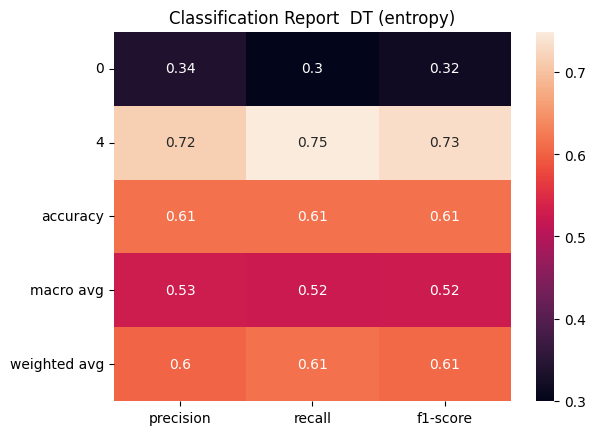

In [76]:
# classification report
clf_report_dt = classification_report(y_valid_bow, y_pred=dct_bow_acc_e, output_dict=True)
plt.title('Classification Report  DT (entropy)')

sns.heatmap(pd.DataFrame(clf_report_dt).iloc[:-1, :].T, annot=True)

In [77]:
# Fitting the Decision Tree model.
from sklearn.tree import DecisionTreeClassifier
dct_g = DecisionTreeClassifier(criterion='gini', random_state = 10,splitter='best')
# Fitting the Decision Tree model.

dct_g.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(random_state=10)

In [78]:
# dct_tfidf = dct_g.predict_proba(x_valid_tfidf)

# dct_tfidf

In [79]:
dct_bow_acc_g = dct_g.predict(x_valid_bow)
accuracy_dt_g = metrics.accuracy_score(y_valid_bow, y_pred=dct_bow_acc_g)
print ('accuracy : ',metrics.accuracy_score(y_valid_bow, y_pred=dct_bow_acc_g))

accuracy :  0.6152333333333333


<AxesSubplot: title={'center': 'Classification Report  DT (Gini)'}>

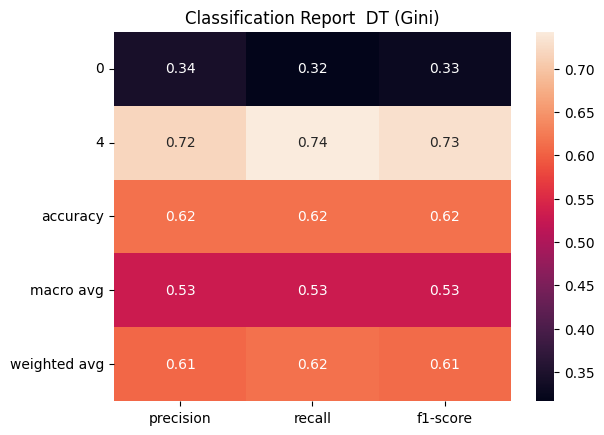

In [80]:
# classification report
clf_report_dt_g = classification_report(y_valid_bow, y_pred=dct_bow_acc_g, output_dict=True)
plt.title('Classification Report  DT (Gini)')

sns.heatmap(pd.DataFrame(clf_report_dt_g).iloc[:-1, :].T, annot=True)

In [81]:
Algo_best_dt = ['DT (Entropy)','DT (Gini)']
score_best_dt = [accuracy_dt_e,accuracy_dt_g]
compare_best_dt = pd.DataFrame({'Model':Algo_best_dt,'Accuracy':score_best_dt},index=[i for i in range(1,3)])
compare_best_dt.T



,1,2
Model,DT (Entropy),DT (Gini)
Accuracy,0.614967,0.615233


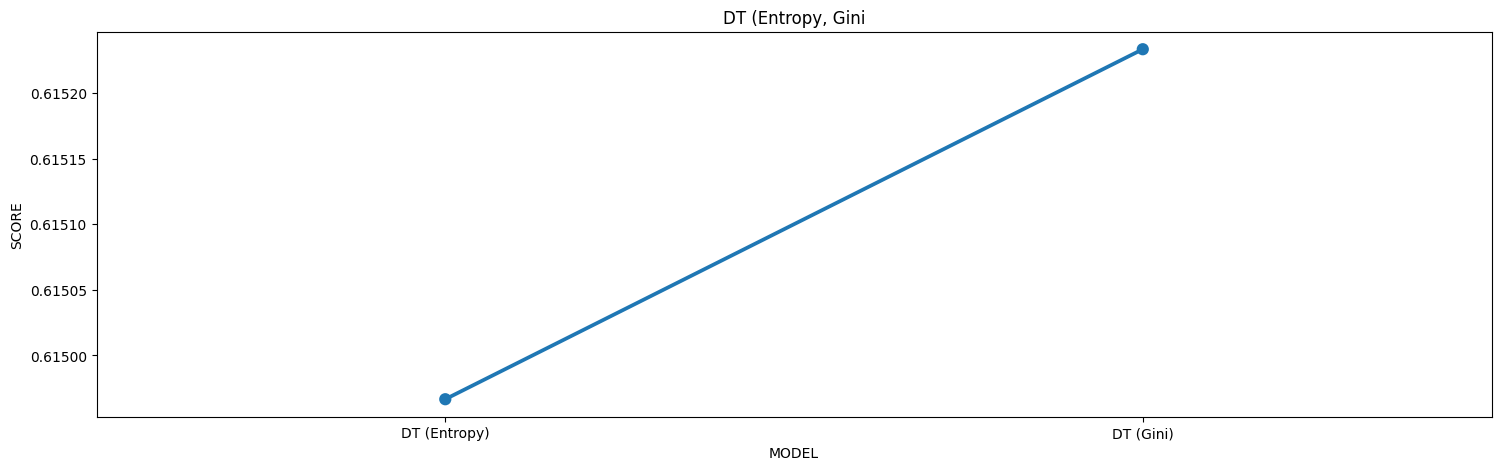

In [82]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='Accuracy',data=compare_best_dt)

plt.title('DT (Entropy, Gini')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()